In [35]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

repo_path = os.getcwd()
input_file = 'snowfall_output.csv' #filename

In [36]:
#load data and cleanup
df_raw = pd.read_csv(repo_path + '/' + input_file, usecols=range(1,12))
df_raw['date'] = pd.to_datetime(df_raw.date)
df_raw['year'] = df_raw.date.dt.year

# annual dataframe
df_a = df_raw[df_raw.time_period=='Annual']

#monthly dataframe
df_m = df_raw[df_raw.time_period=='Monthly']
df_m['month'] = df_m.date.dt.month

/private/var/mobile/Containers/Data/Application/2C18E9C5-83AD-44A1-8DCD-8D7356E37DCF/tmp/ipykernel_2544/697579195.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m['month'] = df_m.date.dt.month


In [37]:
df_a.head()

,date,totalSnow,snowDays,baseDepth,summitDepth,maxBaseDepth,biggestSnowfall,time_period,title,region,slug,year
0,2012-01-01,259.08,16,36.046650,55.573474,91.44,45.72,Annual,Bear Mountain,california,bear-mountain,2012
1,2013-01-01,96.52,8,15.859638,33.124614,30.48,25.40,Annual,Bear Mountain,california,bear-mountain,2013
2,2014-01-01,129.54,10,17.345038,35.654074,45.72,27.94,Annual,Bear Mountain,california,bear-mountain,2014
3,2015-01-01,205.74,16,41.372850,61.254415,101.60,45.72,Annual,Bear Mountain,california,bear-mountain,2015
4,2016-01-01,441.96,19,47.781650,65.219112,116.84,60.96,Annual,Bear Mountain,california,bear-mountain,2016


In [7]:
df_m2 = df_m.set_index(['year','month','region','title'])
df_m2.head()

date  totalSnow  snowDays  \
year month region     title                                           
2023 11    california Bear Mountain 2023-11-03  12.700000         1   
     12    california Bear Mountain 2023-12-03  41.794545         3   
     1     california Bear Mountain 2023-01-03  74.121818         4   
     2     california Bear Mountain 2023-02-03  71.581818         4   
     3     california Bear Mountain 2023-03-03  58.420000         3   

                                     baseDepth  summitDepth  maxBaseDepth  \
year month region     title                                                 
2023 11    california Bear Mountain  26.636645    38.282128         76.20   
     12    california Bear Mountain  48.715000    75.616235         91.44   
     1     california Bear Mountain  70.572027    99.827295        116.84   
     2     california Bear Mountain  84.143100   119.000440        190.50   
     3     california Bear Mountain  84.914782   117.762988        254.00   

                                     biggestSnowfall time_period  \
year month region     title                                        
2023 11    california Bear Mountain            45.72     Monthly   
     12    california Bear Mountain            45.72     Monthly   
     1     california Bear Mountain            71.12     Monthly   
     2     california Bear Mountain            71.12     Monthly   
     3     california Bear Mountain            76.20     Monthly   

                                              slug  
year month region     title                         
2023 11    california Bear Mountain  bear-mountain  
     12    california Bear Mountain  bear-mountain  
     1     california Bear Mountain  bear-mountain  
     2     california Bear Mountain  bear-mountain  
     3     california Bear Mountain  bear-mountain

In [49]:
df_a[df_a.region=='utah'].sort_values('date')

,date,totalSnow,snowDays,baseDepth,summitDepth,maxBaseDepth,biggestSnowfall,time_period,title,region,slug,year
385,2012-01-01,259.08,16,36.046650,55.573474,91.44,45.72,Annual,Alta Ski Area,utah,alta-ski-area,2012
418,2012-01-01,259.08,16,36.046650,55.573474,91.44,45.72,Annual,Deer Valley Resort,utah,deer-valley-resort,2012
429,2012-01-01,259.08,16,36.046650,55.573474,91.44,45.72,Annual,Park City,utah,park-city-mountain-resort,2012
396,2012-01-01,259.08,16,36.046650,55.573474,91.44,45.72,Annual,Brian Head Resort,utah,brian-head-resort,2012
440,2012-01-01,259.08,16,36.046650,55.573474,91.44,45.72,Annual,Snowbasin,utah,snowbasin,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
417,2022-01-01,579.12,25,122.349267,163.010540,254.00,76.20,Annual,Brighton Resort,utah,brighton-resort,2022
406,2022-01-01,579.12,25,122.349267,163.010540,254.00,76.20,Annual,Brian Head Resort,utah,brian-head-resort,2022
395,2022-01-01,579.12,25,122.349267,163.010540,254.00,76.20,Annual,Alta Ski Area,utah,alta-ski-area,2022
461,2022-01-01,579.12,25,122.349267,163.010540,254.00,76.20,Annual,Snowbird,utah,snowbird,2022


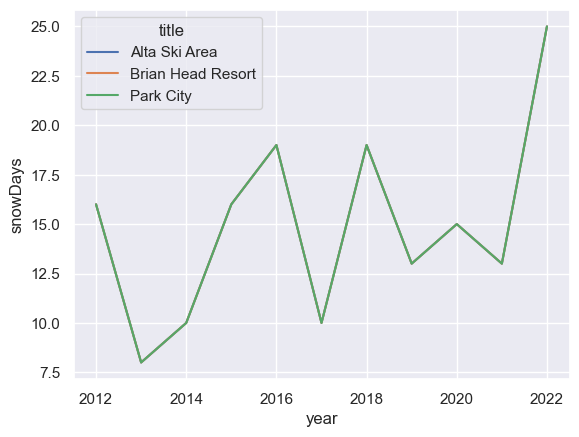

In [52]:
sns.lineplot(df_a[(df_a.region=='utah')&(df_a.title.isin(['Alta Ski Area','Brian Head Resort','Park City']))], 
             x='year', 
             y='snowDays',
             hue='title')
plt.show()